# Prediction using different models

## Pre-Processing

In this section we will apply different pre-processing methods to see which one works best

### One-Hot Encoding per column `data_binary`

In [3]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#### Filtered version `data_binary_filtered`

In [4]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

According to the correlation matrix of the previous data analysis, let's remove theses columns : protocol_type, unusual_time_access, encryption_used, network_packet_size

In [5]:
data = pd.read_csv("cybersecurity_intrusion_data.csv")  # Load data from CSV file into a pandas DataFrame.
for col in data.columns:                               # Start loop through every column name.
    if data[col].dtype == 'object':                    # Check if the column contains categorical data (object type).
        data[col].fillna(data[col].mode()[0], inplace=True) # If categorical, fill missing values (NaN) with the Mode (most frequent value).
    else:                                              # If the column is not categorical (i.e., numerical).
        data[col].fillna(data[col].mean(), inplace=True) # If numerical, fill missing values (NaN) with the Mean (average value).

In [6]:
# List of features/columns to exclude from the DataFrame.
cols_to_remove = ["protocol_type", "network_packet_size", "encryption_used","unusual_time_access", "session_id"]

# Create new DataFrame by removing the specified columns (Feature Selection).
data_clean = data.drop(columns=cols_to_remove)

# Select and store the names of all remaining categorical (object) columns.
categorical_cols = data_clean.select_dtypes(include=['object']).columns

In [7]:
# Initialize the OneHotEncoder object from scikit-learn.
onehot_encoder = OneHotEncoder(
    
    # sparse_output=False: Ensures the output is a dense NumPy array, not a sparse matrix.
    sparse_output=False, 
    
    # handle_unknown="ignore": Tells the encoder to ignore unseen categories during transform (prevents errors).
    handle_unknown="ignore", 
    
    # drop=None: Keeps all one-hot encoded columns (does not drop the first category).
    drop=None 
)

# Apply One-Hot Encoding: Fits the encoder to the categories and transforms the data into an array. 
encoded_array = onehot_encoder.fit_transform(data_clean[categorical_cols])

# Create a DataFrame from the encoded NumPy array for easier handling.
encoded_df = pd.DataFrame(
    
    # encoded_array: The NumPy array resulting from the transformation.
    encoded_array,
    
    # columns=...: Generates column names (e.g., 'featureX_categoryA').
    columns=onehot_encoder.get_feature_names_out(categorical_cols),
    
    # index=...: Ensures the new DataFrame retains the original index for merging.
    index=data_clean.index
)

# Combine the numerical columns with the new encoded (binary) columns.
data_binary_filtered = pd.concat(
    
    # data_clean.drop(columns=categorical_cols): Drops the original categorical columns.
    [data_clean.drop(columns=categorical_cols), encoded_df],
    
    # axis=1: Concatenates the DataFrames horizontally (by columns).
    axis=1
)

# Print the shape (rows, columns) of the initial dataset.
print("Initial data shape:", data.shape)

# Print the shape after removing initial columns.
print("Cleaned (removed cols) shape:", data_clean.shape)

# Print the shape of the final DataFrame after encoding.
print("Final encoded shape:", data_binary_filtered.shape)

Initial data shape: (9537, 11)
Cleaned (removed cols) shape: (9537, 6)
Final encoded shape: (9537, 10)


In [8]:
# Display the first 5 rows (head) of the fully processed DataFrame.
data_binary_filtered.head()

,login_attempts,session_duration,ip_reputation_score,failed_logins,attack_detected,browser_type_Chrome,browser_type_Edge,browser_type_Firefox,browser_type_Safari,browser_type_Unknown
0,4,492.983263,0.606818,1,1,0.0,1.0,0.0,0.0,0.0
1,3,1557.996461,0.301569,0,0,0.0,0.0,1.0,0.0,0.0
2,3,75.044262,0.739164,2,1,1.0,0.0,0.0,0.0,0.0
3,4,601.248835,0.123267,0,1,0.0,0.0,0.0,0.0,1.0
4,5,532.540888,0.054874,1,0,0.0,0.0,1.0,0.0,0.0


#### Unfiltered version `data_binary_unfiltered`

In [9]:
# Selects all columns in the 'data' DataFrame that have the 'object' (categorical) data type.
categorical_cols = data.select_dtypes(include=['object']).columns

In [10]:
# Initialize the OneHotEncoder object from scikit-learn.
onehot_encoder = OneHotEncoder(
    
    # sparse_output=False: Specify the output should be a dense NumPy array.
    sparse_output=False, 
    
    # handle_unknown="ignore": Ignore any new categories found during transformation.
    handle_unknown="ignore", 
    
    # drop=None: Keep all generated binary columns (no category is dropped).
    drop=None 
)

# Fit the encoder to the categories and transform the selected columns into an array. 
encoded_array = onehot_encoder.fit_transform(data[categorical_cols])

# Convert the NumPy array output into a pandas DataFrame.
encoded_df = pd.DataFrame(
    
    # encoded_array: The actual data (0s and 1s) from the transformation.
    encoded_array,
    
    # columns=...: Generate clear, descriptive column names (e.g., 'feature_value').
    columns=onehot_encoder.get_feature_names_out(categorical_cols),
    
    # index=...: Assign the index from the 'data_clean' DataFrame (ensure alignment).
    index=data_clean.index
)

# Combine the numerical columns with the newly created encoded (binary) columns.
data_binary_unfiltered = pd.concat(
    
    # data.drop(columns=categorical_cols): Drops the original text-based categorical columns.
    [data.drop(columns=categorical_cols), encoded_df],
    
    # axis=1: Concatenate the two DataFrames horizontally (column-wise).
    axis=1
)

# Print the dimensions (rows and columns) of the original DataFrame.
print("Initial data shape:", data.shape)

# Print the dimensions of the final, encoded DataFrame.
print("Final encoded shape:", data_binary_unfiltered.shape)

Initial data shape: (9537, 11)
Final encoded shape: (9537, 9554)


In [11]:
# Display the first 5 rows (head) of the final, fully encoded DataFrame.
data_binary_unfiltered.head()

,network_packet_size,login_attempts,session_duration,ip_reputation_score,failed_logins,unusual_time_access,attack_detected,session_id_SID_00001,session_id_SID_00002,session_id_SID_00003,...,protocol_type_ICMP,protocol_type_TCP,protocol_type_UDP,encryption_used_AES,encryption_used_DES,browser_type_Chrome,browser_type_Edge,browser_type_Firefox,browser_type_Safari,browser_type_Unknown
0,599,4,492.983263,0.606818,1,0,1,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,472,3,1557.996461,0.301569,0,0,0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,629,3,75.044262,0.739164,2,0,1,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,804,4,601.248835,0.123267,0,0,1,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,453,5,532.540888,0.054874,1,0,0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


### Label Encoding `data_label`

#### Label Encoding filtered `data_label_filtered`

In [12]:
# List of features/columns to be removed from the DataFrame.
cols_to_remove_filtered = [
    "protocol_type",
    "network_packet_size",
    "encryption_used",
    "unusual_time_access",
    "session_id"
]

# Create a new DataFrame, dropping the specified columns and making a copy.
data_label_filtered = data.drop(columns=cols_to_remove_filtered).copy()

# Initialize an empty dictionary to store the trained LabelEncoder objects.
label_encoders_f = {}

# Loop through columns that still have the 'object' (categorical) data type.
for col in data_label_filtered.select_dtypes(include="object"):
    
    # Initialize a new LabelEncoder object for the current column.
    le = LabelEncoder()
    
    # Apply Label Encoding: Transform the text categories into numerical labels (0, 1, 2, ...). 
    data_label_filtered[col] = le.fit_transform(data_label_filtered[col])
    
    # Store the fitted encoder instance in the dictionary for later use (e.g., inverse transform).
    label_encoders_f[col] = le

In [13]:
# Display the first 5 rows (head) of the DataFrame after Label Encoding.
data_label_filtered.head()

,login_attempts,session_duration,ip_reputation_score,failed_logins,browser_type,attack_detected
0,4,492.983263,0.606818,1,1,1
1,3,1557.996461,0.301569,0,2,0
2,3,75.044262,0.739164,2,0,1
3,4,601.248835,0.123267,0,4,1
4,5,532.540888,0.054874,1,2,0


#### Label Encoding Unfiltered `data_label_unfiltered`

In [14]:
# Create a copy of the original DataFrame 'data' for processing.
data_label_unfiltered = data.copy()

# Initialize an empty dictionary to store the fitted LabelEncoder objects.
label_encoders_nf = {}

# Loop through all columns in the DataFrame that have the 'object' (categorical) data type.
for col in data_label_unfiltered.select_dtypes(include="object"):
    
    # Initialize a new LabelEncoder instance for the current column.
    le = LabelEncoder()
    
    # Apply Label Encoding: Convert text categories to unique integers (0, 1, 2, ...). 
    data_label_unfiltered[col] = le.fit_transform(data_label_unfiltered[col])
    
    # Store the fitted encoder instance in the dictionary.
    label_encoders_nf[col] = le

In [15]:
# Display the first 5 rows (head) of the DataFrame after Label Encoding.
data_label_unfiltered.head()

,session_id,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,0,599,1,4,492.983263,1,0.606818,1,1,0,1
1,1,472,1,3,1557.996461,1,0.301569,0,2,0,0
2,2,629,1,3,75.044262,1,0.739164,2,0,0,1
3,3,804,2,4,601.248835,1,0.123267,0,4,0,1
4,4,453,1,5,532.540888,0,0.054874,1,2,0,0


### Feature Engineering `data_feature`

Creation of two new features : failure_rate, duration_per_attempt

In [16]:
# Create a copy of the original DataFrame 'data'.
data_feature = data.copy()

# Initialize an empty dictionary to store the fitted LabelEncoder objects.
label_encoders = {}

# Loop through all columns that have the 'object' (categorical) data type.
for col in data_feature.select_dtypes(include=['object']).columns:
    
    # Initialize a new LabelEncoder instance.
    le = LabelEncoder()
    
    # Apply Label Encoding: Convert text categories to unique integers (0, 1, 2, ...). 
    data_feature[col] = le.fit_transform(data_feature[col])
    
    # Store the fitted encoder instance in the dictionary.
    label_encoders[col] = le

# Remove any rows in the DataFrame that are exact duplicates.
data_feature.drop_duplicates(inplace=True)

# Feature Engineering: Create a new feature 'failure_rate'.
data_feature['failure_rate'] = np.where(
    
    # data_feature['login_attempts'] > 0: Check if login attempts occurred to avoid division by zero.
    data_feature['login_attempts'] > 0,
    
    # data_feature['failed_logins'] / data_feature['login_attempts']: Calculate the ratio of failed logins to total attempts.
    data_feature['failed_logins'] / data_feature['login_attempts'],
    
    # 0: Assign 0 if no login attempts were made.
    0
)

# Feature Engineering: Create a new feature 'duration_per_attempt'.
data_feature['duration_per_attempt'] = np.where(
    
    # data_feature['login_attempts'] > 0: Check if login attempts occurred.
    data_feature['login_attempts'] > 0,
    
    # data_feature['session_duration'] / data_feature['login_attempts']: Calculate session duration per attempt.
    data_feature['session_duration'] / data_feature['login_attempts'],
    
    # 0: Assign 0 if no login attempts were made.
    0
)

In [17]:
# Display the first 5 rows (head) of the DataFrame after feature engineering.
data_feature.head()

,session_id,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected,failure_rate,duration_per_attempt
0,0,599,1,4,492.983263,1,0.606818,1,1,0,1,0.250000,123.245816
1,1,472,1,3,1557.996461,1,0.301569,0,2,0,0,0.000000,519.332154
2,2,629,1,3,75.044262,1,0.739164,2,0,0,1,0.666667,25.014754
3,3,804,2,4,601.248835,1,0.123267,0,4,0,1,0.000000,150.312209
4,4,453,1,5,532.540888,0,0.054874,1,2,0,0,0.200000,106.508178


## Models

In this section we will apply different models to all the pre-processed dataframes that we obtained previously in the preprocessing step

### Logistic Regression

#### Using One-Hot Encoder & filtered dataframe `data_binary_filtered`

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

In [19]:
# Separate the features (X) by dropping the target column "attack_detected".
X = data_binary_filtered.drop(columns=["attack_detected"])

# Define the target variable (y) as the "attack_detected" column.
y = data_binary_filtered["attack_detected"]

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
# Initialize a Linear Regression model object.
lr_filtered = LinearRegression()

# Train the Linear Regression model using the scaled training features and target variable.
lr_filtered.fit(X_train_scaled, y_train)

LinearRegression()

In [22]:
# Use the trained linear model to predict continuous values (scores) on the scaled test set.
y_pred_cont_f = lr_filtered.predict(X_test_scaled)

# Convert continuous scores to binary predictions (0 or 1) using a 0.5 threshold.
y_pred_bin_f = (y_pred_cont_f >= 0.5).astype(int)

In [23]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calculate the overall fraction of correct predictions.
test_accuracy = accuracy_score(y_test, y_pred_bin_f)

# Generate a text summary of precision, recall, and F1-score for each class.
classif_report = classification_report(y_test, y_pred_bin_f)

# Compute the matrix showing the counts of True Positives, False Positives, etc. 
conf_matrix = confusion_matrix(y_test, y_pred_bin_f)

print(f"Test accuracy: {test_accuracy:.4f}\n")
print("Classification report:")
print(classif_report)
print("\nConfusion matrix:")
print(conf_matrix)

Test accuracy: 0.7343

Classification report:
              precision    recall  f1-score   support

           0       0.74      0.81      0.77      1055
           1       0.73      0.64      0.68       853

    accuracy                           0.73      1908
   macro avg       0.73      0.73      0.73      1908
weighted avg       0.73      0.73      0.73      1908


Confusion matrix:
[[853 202]
 [305 548]]


#### Using One-Hot Encoder & unfiltered dataframe `data_binary_unfiltered`

In [24]:
# Separate the features (X) by dropping the target column "attack_detected".
X = data_binary_unfiltered.drop(columns=["attack_detected"])

# Define the target variable (y) as the "attack_detected" column.
y = data_binary_unfiltered["attack_detected"]

# Split the data into training (80%) and testing (20%) sets.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [25]:
scaler = StandardScaler()

# Fit the scaler to the training data (calculate mean/stdev) and transform it.
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the statistics calculated from the training data.
X_test_scaled = scaler.transform(X_test)

In [26]:
lr_filtered = LinearRegression()
lr_filtered.fit(X_train_scaled, y_train)

LinearRegression()

In [27]:
# Use the trained linear model to predict continuous values (scores) on the scaled test set.
y_pred_cont_f = lr_filtered.predict(X_test_scaled)

# Convert continuous scores to binary predictions (0 or 1) using a 0.5 threshold.
y_pred_bin_f = (y_pred_cont_f >= 0.5).astype(int)

In [28]:
# Calculate the overall fraction of correct predictions (Accuracy).
test_accuracy = accuracy_score(y_test, y_pred_bin_f)

# Generate a text summary detailing Precision, Recall, and F1-score per class.
classif_report = classification_report(y_test, y_pred_bin_f)

# Compute the matrix showing the counts of true/false positives/negatives. 
conf_matrix = confusion_matrix(y_test, y_pred_bin_f)

print(f"Test accuracy: {test_accuracy:.4f}\n")
print("Classification report:")
print(classif_report)
print("\nConfusion matrix:")
print(conf_matrix)

Test accuracy: 0.7348

Classification report:
              precision    recall  f1-score   support

           0       0.71      0.87      0.78      1055
           1       0.78      0.56      0.66       853

    accuracy                           0.73      1908
   macro avg       0.75      0.72      0.72      1908
weighted avg       0.74      0.73      0.73      1908


Confusion matrix:
[[921 134]
 [372 481]]


#### Using label encoder & unfilterd dataframe

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import numpy as np
import pandas as pd

# List of columns to be excluded from the feature set (X).
cols_to_drop = [
    'attack_detected',       
    'session_id' 
]

# Define the feature set (X) by dropping the listed columns from the original DataFrame.
X = data.drop(cols_to_drop, axis=1)

# Define the target variable (y) as the 'attack_detected' column.
y = data['attack_detected']

# Split Train/Test: Partition data for model training and evaluation.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Identification of columns type: Identify columns containing numerical data.
numerical_features = X.select_dtypes(include=np.number).columns

# Identification of columns type: Identify columns containing categorical data.
categorical_features = X.select_dtypes(include='object').columns

# Pipeline construction: Define a pipeline for numerical features.
numerical_transformer = Pipeline(steps=[
    # 'scaler': Apply Standard Scaling to normalize numerical data.
    ('scaler', StandardScaler())
])

# Encoding by numerotation (Ordinal): Define a pipeline for categorical features.
categorical_transformer = Pipeline(steps=[
    # 'imputer': Fills any missing values (NaN) with the string 'Unknown'.
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')), 
    # 'ordinal': Encodes categories into numerical integers (0, 1, 2...). 
    ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)) 
])

# ColumnTransformer: Combine the numerical and categorical pipelines.
preprocessor = ColumnTransformer(
    transformers=[
        # Apply the numerical pipeline.
        ('num', numerical_transformer, numerical_features),
        # Apply the categorical pipeline.
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Application: The preprocessing is executed.
# Fitting: Calculates statistics on the training data and transforms it.
X_train_processed = preprocessor.fit_transform(X_train)

# Transform: Uses the calculated training statistics to transform the test data.
X_test_processed = preprocessor.transform(X_test)

# Print the size of the resulting processed training set.
print(f"New size X_train : {X_train_processed.shape}")


New size X_train : (7629, 9)


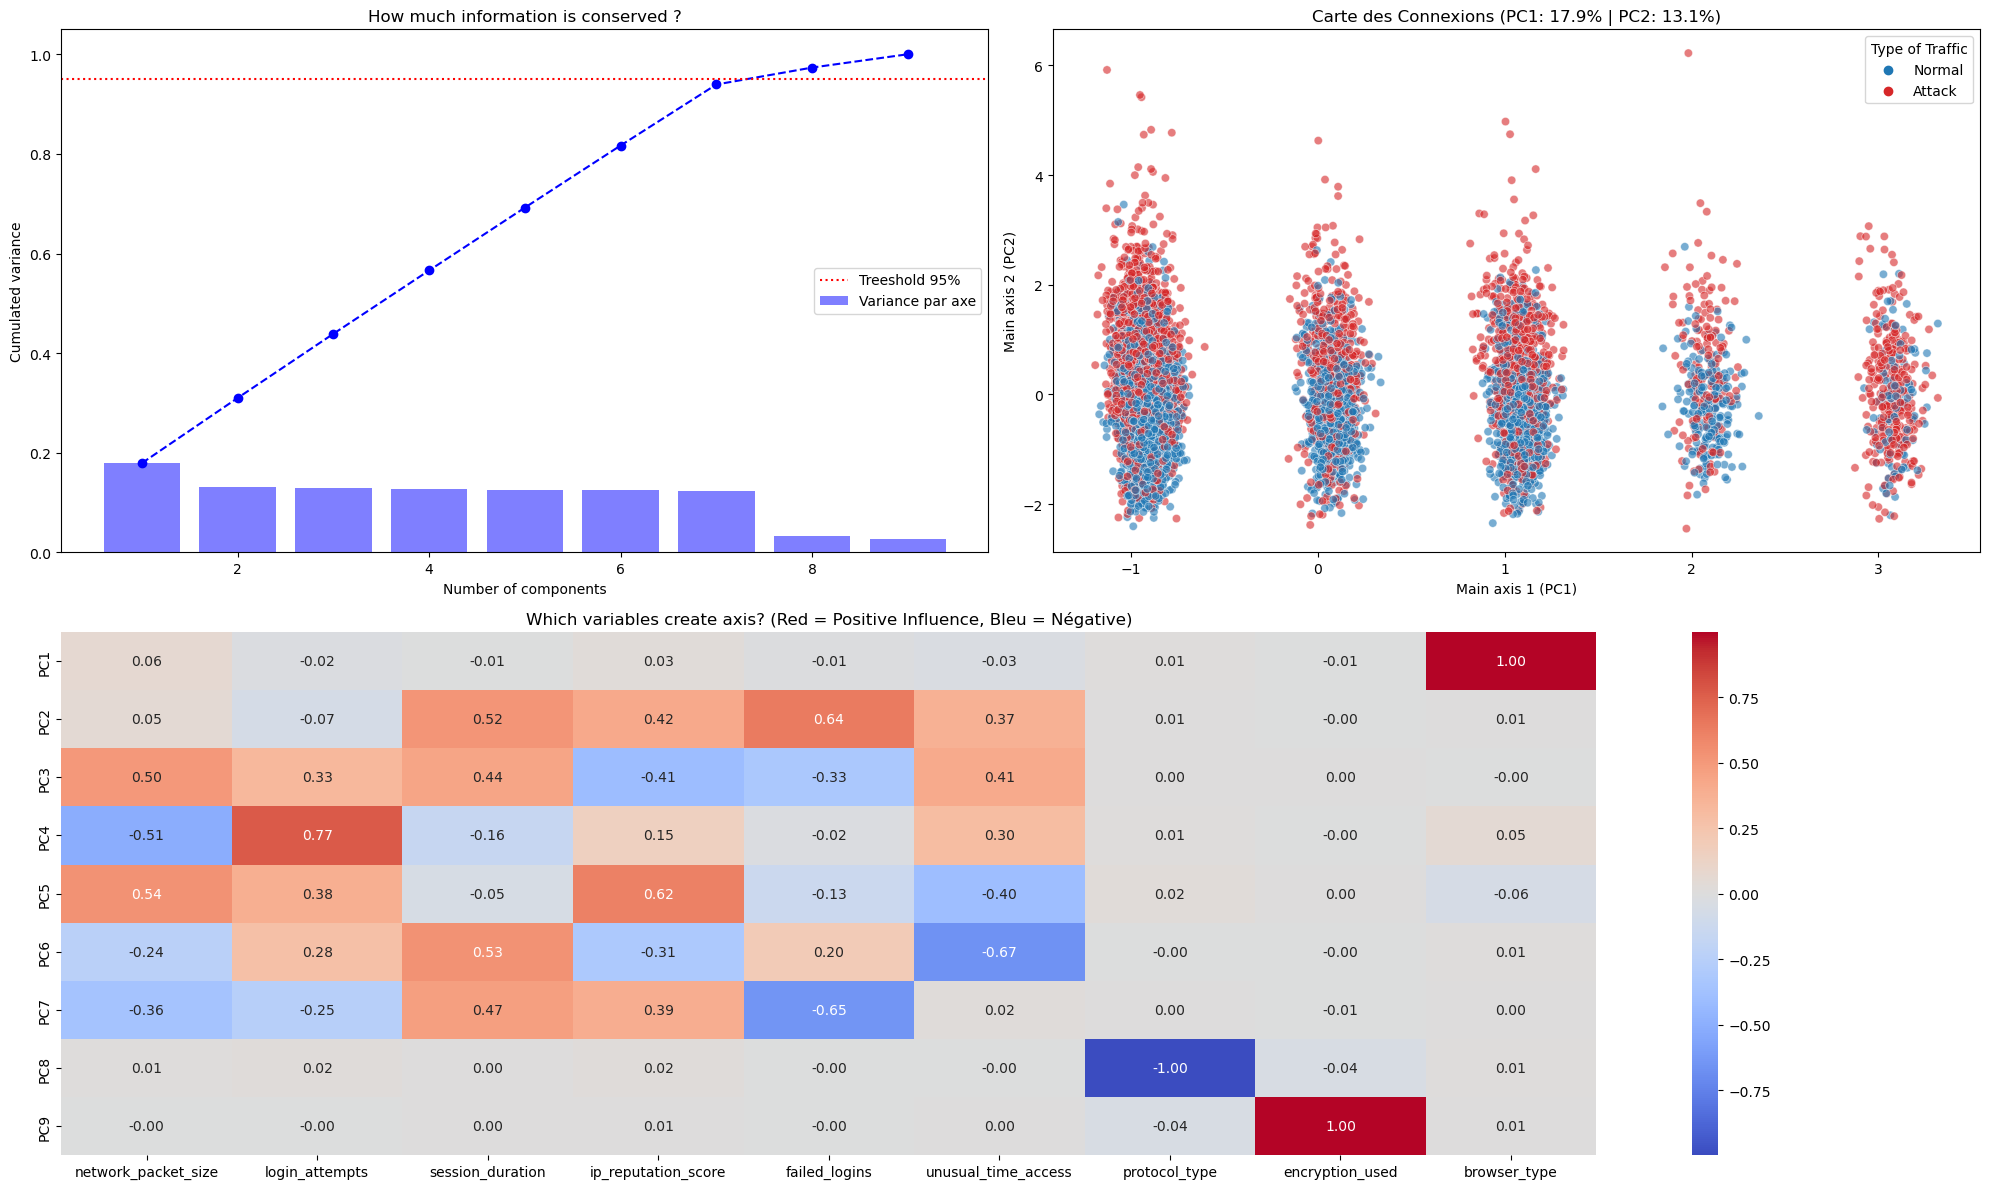

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
# Create a combined list of all feature names (numerical + categorical).
feature_names = list(numerical_features) + list(categorical_features)

# ACP (Principal Component Analysis)
# Initialize the PCA object.
pca = PCA()
# Fit PCA to the processed training data and apply the transformation. 
X_pca = pca.fit_transform(X_train_processed)

# Variance calculus
# Calculate the variance explained by each component.
explained_variance = pca.explained_variance_ratio_
# Calculate the cumulative sum of explained variance.
cumulative_variance = np.cumsum(explained_variance)

# Visualisation
# Create the figure and subplot layout for the visualization.
fig = plt.figure(figsize=(20, 12))
gs = fig.add_gridspec(2, 2)

# Explained Variance
# Add subplot for the explained variance plot.
ax1 = fig.add_subplot(gs[0, 0])
# Plot the cumulative explained variance line.
ax1.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='blue')
# Plot bars for the individual explained variance per component.
ax1.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, color='blue', label='Variance par axe')
# Add a horizontal line at the 95% threshold.
ax1.axhline(y=0.95, color='r', linestyle=':', label='Treeshold 95%')
# Set plot titles and labels.
ax1.set_title('How much information is conserved ?')
ax1.set_xlabel('Number of components')
ax1.set_ylabel('Cumulated variance')
ax1.legend()

# Projection 2D
# Add subplot for the 2D projection scatter plot.
ax2 = fig.add_subplot(gs[0, 1])

# Create a DataFrame containing the first two principal components (PC1, PC2) and the target variable.
pca_df = pd.DataFrame(data=X_pca[:, :2], columns=['PC1', 'PC2'])
pca_df['Target'] = y_train.values

# Create the scatter plot, colored by the target variable (Attack vs. Normal).
scatter = sns.scatterplot(
    x='PC1', y='PC2', hue='Target', data=pca_df, 
    palette={0: 'tab:blue', 1: 'tab:red'}, alpha=0.6, ax=ax2
)
# Set plot titles and labels.
ax2.set_title(f'Carte des Connexions (PC1: {explained_variance[0]:.1%} | PC2: {explained_variance[1]:.1%})')
ax2.set_xlabel('Main axis 1 (PC1)')
ax2.set_ylabel('Main axis 2 (PC2)')
ax2.legend(ax2.get_legend_handles_labels()[0], ['Normal', 'Attack'], title="Type of Traffic")

# Matrix of points (Loadings Heatmap)
# Add subplot for the heatmap, spanning the bottom row.
ax3 = fig.add_subplot(gs[1, :]) 

# Create a DataFrame to hold the component loadings (coefficients).
loadings = pd.DataFrame(
    pca.components_.T, 
    columns=[f'PC{i+1}' for i in range(X_train_processed.shape[1])],
    index=feature_names
)
# Create the heatmap to visualize variable contribution (loadings) to the principal components.
sns.heatmap(loadings.T, annot=True, cmap='coolwarm', center=0, fmt=".2f", ax=ax3)
# Set plot titles and labels.
ax3.set_title("Which variables create axis? (Red = Positive Influence, Bleu = Négative)")

# Adjust subplot parameters for a tight layout and display the final figure.
plt.tight_layout()
plt.show()

#### Using label encoder & filtered dataframe

Nouvelle taille de X_train : (7629, 5)


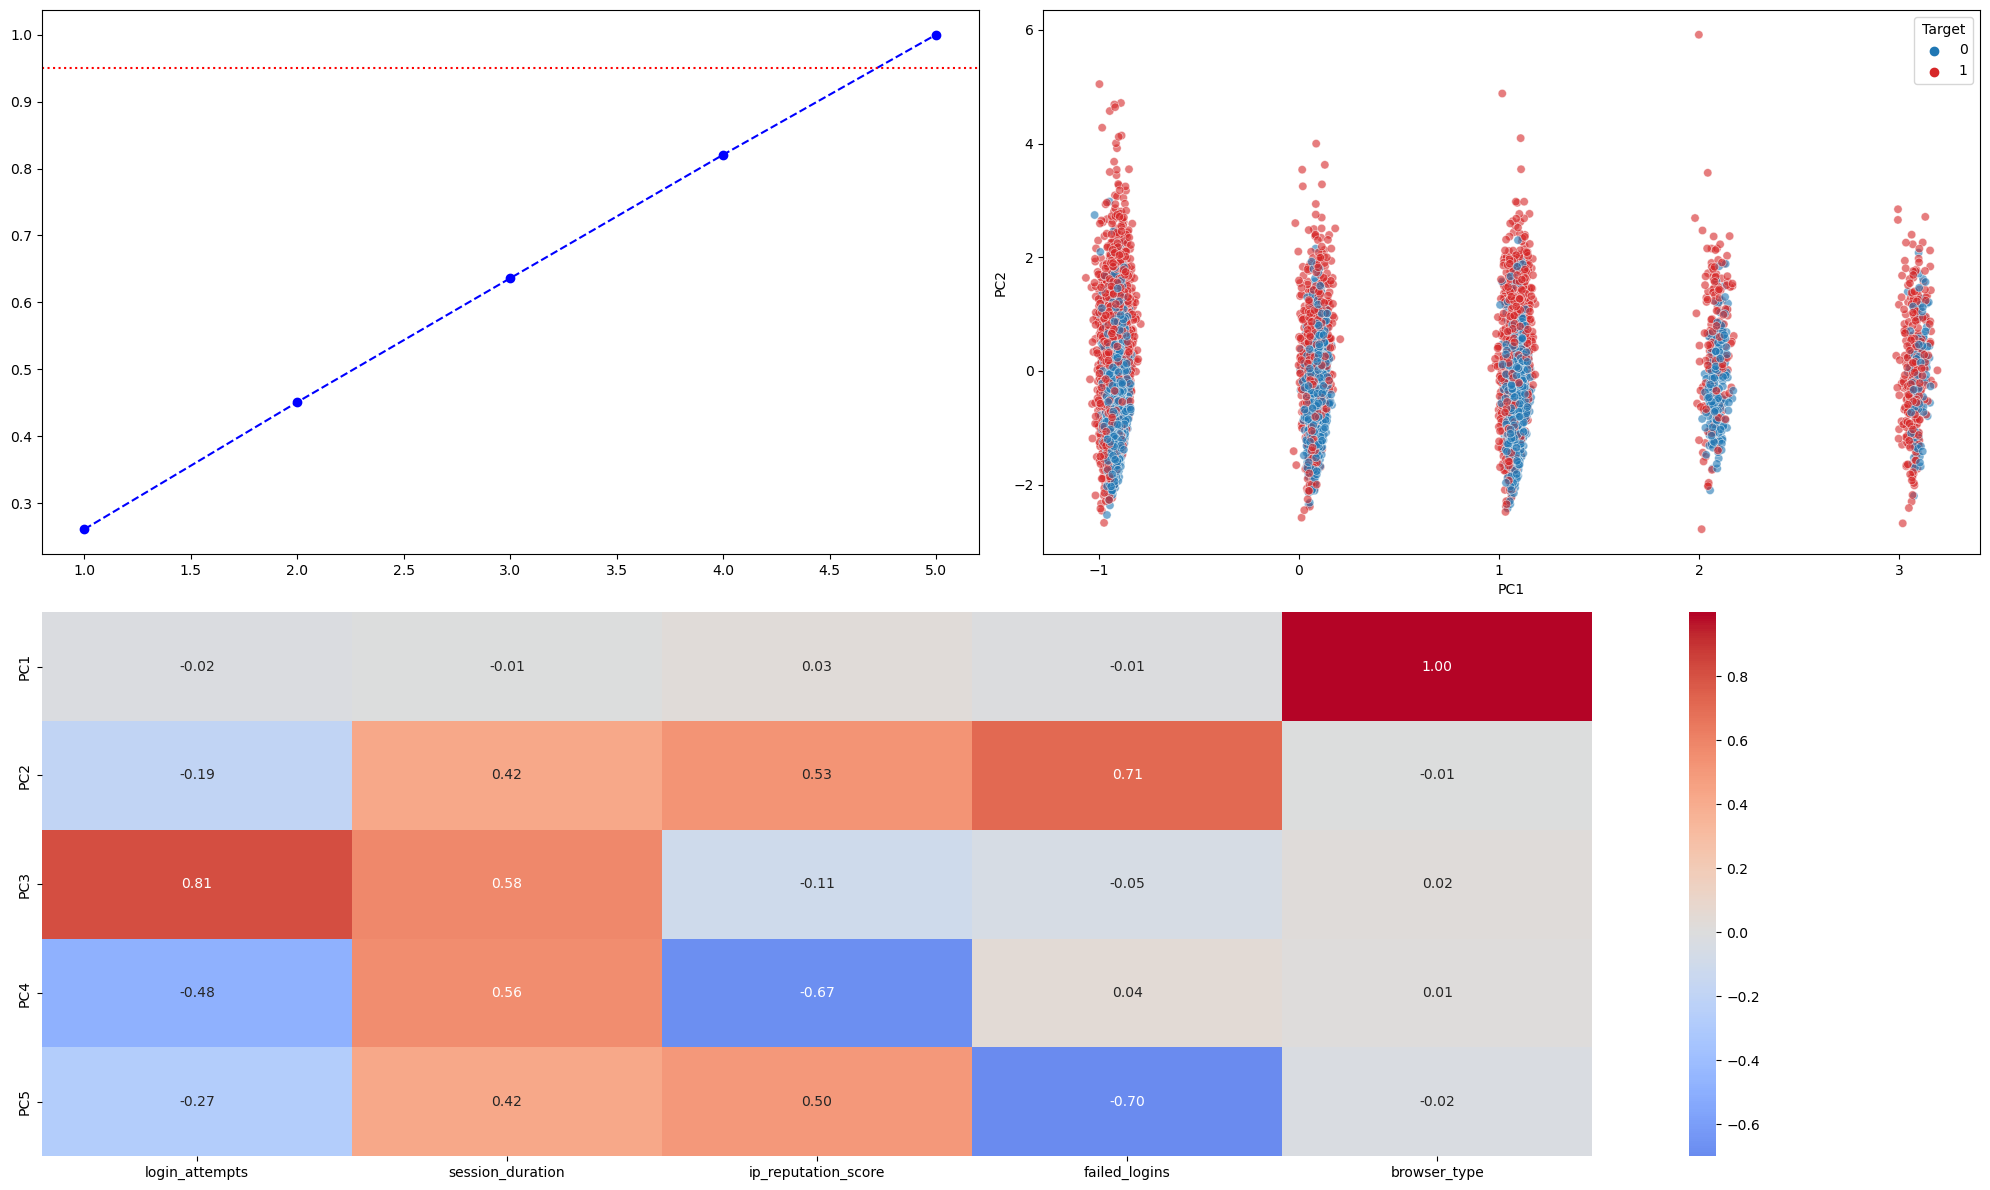

In [31]:
# List of columns to be excluded from the feature set (X).
cols_to_drop = [
    'attack_detected',        
    'session_id',             
    'protocol_type',          
    'unusual_time_access',    
    'encryption_used',        
    'network_packet_size'     
]

# Define the feature set (X) by dropping the listed columns.
X = data.drop(cols_to_drop, axis=1)
# Define the target variable (y).
y = data['attack_detected']

# Partition data into 80% training and 20% testing sets.
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Identify numerical features.
numerical_features = X.select_dtypes(include=np.number).columns
# Identify categorical features.
categorical_features = X.select_dtypes(include='object').columns

# Define Standard Scaler for numerical data.
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Define pipeline for categorical data (Imputation + Ordinal Encoding). 
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')), 
    ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)) 
])

# ColumnTransformer: Combine numerical and categorical pipelines.
preprocessor_reduced = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Fit the preprocessor on the training data and transform it.
X_train_processed_reduced = preprocessor_reduced.fit_transform(X_train_reduced) 
# Transform the test data using training statistics.
X_test_processed_reduced = preprocessor_reduced.transform(X_test_reduced)

# Print the size of the resulting processed training set.
print(f"Nouvelle taille de X_train : {X_train_processed_reduced.shape}")

# Create combined list of feature names for PCA interpretation.
feature_names = list(numerical_features) + list(categorical_features)

# Initialize PCA object.
pca = PCA()
# Fit PCA to the processed training data and transform it. 
X_pca = pca.fit_transform(X_train_processed_reduced)

# Calculate variance explained by each component.
explained_variance = pca.explained_variance_ratio_
# Calculate the cumulative explained variance.
cumulative_variance = np.cumsum(explained_variance)

# Create figure and subplot layout.
fig = plt.figure(figsize=(20, 12))
# Add subplot for the explained variance plot.
ax1 = fig.add_subplot(gs[0, 0])
# Add subplot for the 2D scatter plot.
ax2 = fig.add_subplot(gs[0, 1])
# Add subplot for the loadings heatmap.
ax3 = fig.add_subplot(gs[1, :]) 

# Plot cumulative explained variance.
ax1.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='blue')
# Add 95% threshold line.
ax1.axhline(y=0.95, color='r', linestyle=':', label='Treeshold 95%')

# Create DataFrame for 2D projection using PC1 and PC2.
pca_df = pd.DataFrame(data=X_pca[:, :2], columns=['PC1', 'PC2'])
pca_df['Target'] = y_train_reduced.values

# Create scatter plot, colored by the target variable.
sns.scatterplot(
    x='PC1', y='PC2', hue='Target', data=pca_df, 
    palette={0: 'tab:blue', 1: 'tab:red'}, alpha=0.6, ax=ax2
)

# Create DataFrame to hold the component loadings (coefficients).
loadings = pd.DataFrame(
    pca.components_.T, 
    columns=[f'PC{i+1}' for i in range(X_train_processed_reduced.shape[1])],
    index=feature_names
)
# Create heatmap to visualize feature contribution to components.
sns.heatmap(loadings.T, annot=True, cmap='coolwarm', center=0, fmt=".2f", ax=ax3)

# Adjust subplot parameters and display the figure.
plt.tight_layout()
plt.show()

#### Analysis of PCA on Reduced dataset
The variance is distributed almost evenly across the 5 remaining components (approx. 20-25% each). This is unusual and indicates that there is no single "dominant" feature. All retained variables contribute equally to the dataset's structure, implying that the information is dense and cannot be easily compressed further without loss.

For the projection, we are only choosing PC1 and PC2 because they are the one with the best cumulated variance. So, the projection exhibits a distinct "barcode" or vertical striping pattern. This is an artifact of the Ordinal Encoding applied to the categorical feature (likely browser_type), creating discrete columns at x = -1, 0, 1, etc. Within these vertical bands, the "Normal" (blue) and "Attack" (red) points are heavily overlapped. There is no clear linear boundary separating the two classes. However, we observe that the red points (attacks) tend to reach higher extremes on the Y-axis (PC2), suggesting that attacks are characterized by extreme values in behavioral features (like session_duration or failed_logins).

#### Analysis of PCA on Full dataset (except the session_id column) 
The complexity is significantly higher here. It takes about 8 out of 9 components to explain 95% of the variance. This fragmentation confirms that every feature in the original dataset carries unique, non-redundant information.
PC1 is almost entirely driven by browser_type (correlation of 1.00).PC2 captures behavioral anomalies (failed_logins, session_duration).
Similar to the reduced dataset, we see the "barcode" effect driven by the browser type on PC1. The separation remains non-linear: attacks are hidden inside the traffic of each browser type, distinguishable mainly by their vertical spread .

#### Comparison of the two 
Comparing the two results highlights the risks of manual feature selection. In the Reduced Dataset, the PCA showed a simplified structure, but the Full Dataset PCA revealed that the variables we removed (protocol_type, encryption_used) actually constituted independent axes of variance (PC8 and PC9). By removing them, we were effectively discarding entire dimensions of the problem, potentially blinding the model to specific attack vectors relying on protocols or encryption types.

#### Conclusion 
The visualization of the Full Dataset demonstrates that the problem is highly non-linear. A simple line cannot separate the blue and red points clustered within the vertical bands.The fragmented variance proves that every column is necessary to capture the full picture of network traffic.
The strong overlap of classes confirms that linear models (like the baseline Logistic Regression) will underperform. The visual evidence strongly supports the move to non-linear algorithms like Random Forest (which can isolate the specific "bands")


Best Parameters (Full): {'classifier__C': 0.01, 'classifier__penalty': 'l1'}

CLASSIFICATION REPORT (FULL):
              precision    recall  f1-score   support

      Normal       0.74      0.77      0.75      1055
      Attack       0.70      0.66      0.68       853

    accuracy                           0.72      1908
   macro avg       0.72      0.71      0.72      1908
weighted avg       0.72      0.72      0.72      1908

AUC-ROC Score : 0.7789

Best Parameters (Reduced): {'classifier__C': 0.01, 'classifier__penalty': 'l1'}

CLASSIFICATION REPORT (REDUCED):
              precision    recall  f1-score   support

      Normal       0.74      0.77      0.75      1055
      Attack       0.70      0.66      0.68       853

    accuracy                           0.72      1908
   macro avg       0.72      0.72      0.72      1908
weighted avg       0.72      0.72      0.72      1908

AUC-ROC Score : 0.7792


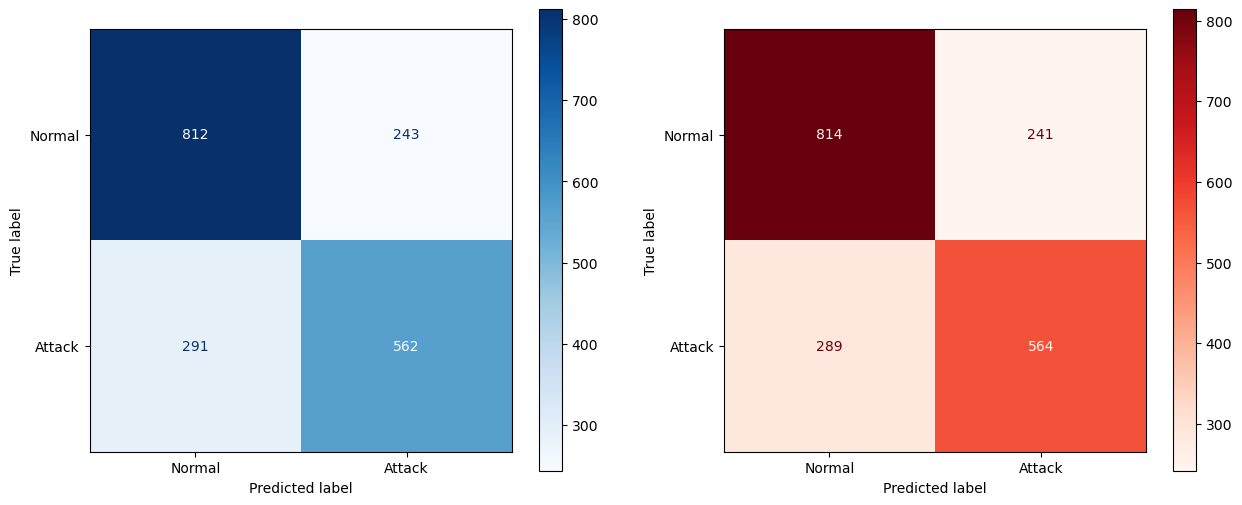

In [32]:
## Pipeline
# Define the hyperparameter grid for the Grid Search.
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2']
}

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, ConfusionMatrixDisplay
# Full model 
# Construct the full Pipeline: Preprocessor + Classifier.
pipeline_lr = Pipeline([
    ('preprocessor', preprocessor), 
    ('classifier', LogisticRegression(max_iter=1000, solver='liblinear', random_state=42))
])

# Initialize Grid Search with the pipeline and parameter grid.
grid_search = GridSearchCV(pipeline_lr, param_grid, cv=5, scoring='recall', n_jobs=-1)
# Execute Grid Search on the full training data. 
grid_search.fit(X_train, y_train)

# Save the best-performing model.
best_model_full = grid_search.best_estimator_ 
# Predict class labels on the full test set.
y_pred = best_model_full.predict(X_test)
# Predict probability scores for the positive class.
y_proba = best_model_full.predict_proba(X_test)[:, 1]

# Reduced model 
# Construct the reduced Pipeline: Reduced Preprocessor + Classifier.
pipeline_lr_reduced = Pipeline([
    ('preprocessor', preprocessor_reduced), 
    ('classifier', LogisticRegression(max_iter=1000, solver='liblinear', random_state=42))
])

# Initialize Grid Search for the reduced model.
grid_search_reduced = GridSearchCV(pipeline_lr_reduced, param_grid, cv=5, scoring='recall', n_jobs=-1)
grid_search_reduced.fit(X_train_reduced, y_train_reduced)

# Save the best-performing reduced model.
best_model_reduced = grid_search_reduced.best_estimator_
# Predict class labels on the reduced test set.
y_pred_reduced = best_model_reduced.predict(X_test_reduced)
# Predict probability scores for the positive class.
y_proba_reduced = best_model_reduced.predict_proba(X_test_reduced)[:, 1]

# Classification reports 
print(f"\nBest Parameters (Full): {grid_search.best_params_}")
print("\nCLASSIFICATION REPORT (FULL):")
print(classification_report(y_test, y_pred, target_names=['Normal', 'Attack']))
print(f"AUC-ROC Score : {roc_auc_score(y_test, y_proba):.4f}")

print(f"\nBest Parameters (Reduced): {grid_search_reduced.best_params_}")
print("\nCLASSIFICATION REPORT (REDUCED):")
print(classification_report(y_test_reduced, y_pred_reduced, target_names=['Normal', 'Attack']))
print(f"AUC-ROC Score : {roc_auc_score(y_test_reduced, y_proba_reduced):.4f}")

# Confusion Matrices
# Create figure with 1 row and 2 columns for the two confusion matrices.
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot the Confusion Matrix for the full model. 
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['Normal', 'Attack'], cmap='Blues', ax=axes[0])
# Plot the Confusion Matrix for the reduced model.
ConfusionMatrixDisplay.from_predictions(y_test_reduced, y_pred_reduced, display_labels=['Normal', 'Attack'], cmap='Reds', ax=axes[1])

plt.show()

### SVM

#### Unsing One-Hot Encoded & filtered dataframe `data_binary_filtered`

In [33]:
from sklearn.model_selection import train_test_split

y = data_binary_filtered["attack_detected"]
X = data_binary_filtered.drop(columns=["attack_detected"])

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  
)


Standardisation

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Train with RBF Kernel. 
We use an SVM with an RBF kernel because intrusion detection is generally a non-linear classification problem. The RBF kernel can capture complex boundaries between malicious and normal traffic, making it more effective than a linear kernel. It also works well with high-dimensional data, which fits our dataset after one-hot encoding.

In [35]:
from sklearn.svm import SVC

# Initialize the Support Vector Classifier (SVC) with an RBF kernel.
svm_clf = SVC(kernel="rbf", C=1.0, gamma="scale", random_state=42)
# Train the SVC model using the scaled training features and target variable.
svm_clf.fit(X_train_scaled, y_train)

SVC(random_state=42)

In [36]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = svm_clf.predict(X_test_scaled)

acc = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {acc:.4f}")

print("\nClassification report:")
print(classification_report(y_test, y_pred))

print("\nConfusion matrix:")
print(confusion_matrix(y_test, y_pred))


Test accuracy: 0.8721

Classification report:
              precision    recall  f1-score   support

           0       0.82      0.98      0.89      1055
           1       0.97      0.74      0.84       853

    accuracy                           0.87      1908
   macro avg       0.90      0.86      0.87      1908
weighted avg       0.89      0.87      0.87      1908


Confusion matrix:
[[1035   20]
 [ 224  629]]


Grid Search

In [37]:
# Define the dictionary of hyperparameters to be tested by GridSearchCV.
param_grid = {
    
    # "C": Regularization parameter (controls penalty for misclassification).
    "C": [0.1, 5, 10],
    
    # "gamma": Kernel coefficient (controls influence of single samples). 
    "gamma": ["auto", 0.001, 0.0001],
    
    # "kernel": Specifies the kernel function ('rbf' for non-linear boundary).
    "kernel": ["rbf"] 
}

In [38]:
from sklearn.model_selection import GridSearchCV

# Initialize the Support Vector Classifier (SVC) as the base model.
svm_model = SVC()

# Initialize the Grid Search object.
grid_search = GridSearchCV(
    estimator=svm_model,
    param_grid=param_grid,
    cv=5, 
    scoring="accuracy", 
    n_jobs=-1, 
    verbose=2
)

# Execute Grid Search: Fit the search to the scaled training data. 
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 5, 10], 'gamma': ['auto', 0.001, 0.0001],
                         'kernel': ['rbf']},
             scoring='accuracy', verbose=2)

Results of the Grid Search

In [39]:
print("Best parameters found:", grid_search.best_params_)
print("Best CV accuracy:", grid_search.best_score_)


Best parameters found: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Best CV accuracy: 0.8830764669230604


In [40]:
best_svm = grid_search.best_estimator_

y_pred = best_svm.predict(X_test_scaled)

print("Test accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Test accuracy: 0.8747379454926625

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.98      0.90      1055
           1       0.98      0.74      0.84       853

    accuracy                           0.87      1908
   macro avg       0.90      0.86      0.87      1908
weighted avg       0.89      0.87      0.87      1908


Confusion Matrix:
[[1039   16]
 [ 223  630]]


#### Using One-Hot Encoded & unfiltered dataframe `data_binary_unfiltered`

In [41]:
y = data_binary_unfiltered["attack_detected"]
X = data_binary_unfiltered.drop(columns=["attack_detected"])

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y 
)

In [42]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [43]:
from sklearn.svm import LinearSVC 
svm_model = SVC() # Initializes SVC, likely to be used later.

# Initialize the Support Vector Classifier (SVC) with an RBF kernel.
svm_clf = SVC(kernel="rbf", C=1.0, gamma="scale", random_state=42)
# Train the SVC model using the scaled training features and target variable. 
svm_clf.fit(X_train_scaled, y_train)

SVC(random_state=42)

In [44]:
y_pred = svm_clf.predict(X_test_scaled)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification report:")
print(classification_report(y_test, y_pred))
print("\nConfusion matrix:")
print(confusion_matrix(y_test, y_pred))

Test Accuracy: 0.5812368972746331

Classification report:
              precision    recall  f1-score   support

           0       0.57      1.00      0.73      1055
           1       1.00      0.06      0.12       853

    accuracy                           0.58      1908
   macro avg       0.78      0.53      0.42      1908
weighted avg       0.76      0.58      0.45      1908


Confusion matrix:
[[1055    0]
 [ 799   54]]


Grid Search

In [ ]:
grid_search = GridSearchCV(
    estimator=svm_model,
    param_grid=param_grid,
    cv=5,  
    scoring="accuracy",  
    n_jobs=-1,           
    verbose=2
)

grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


In [ ]:
print("Best parameters (full data):", grid_search.best_params_)
print("Best CV accuracy (full data):", grid_search.best_score_)


Grid Search Results

In [ ]:
best_svm = grid_search.best_estimator_

y_pred = best_svm.predict(X_test_scaled)

print("Test accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

### RandomForestClassifier

#### Using One-Hot Encoded & filtered dataframe `data_binary_filtered`

In [45]:
# Initialize an empty dictionary to store the fitted LabelEncoder objects.
label_encoders = {}
# Loop through all columns in the DataFrame that have the 'object' (categorical) data type.
for col in data_binary_filtered.select_dtypes(include=['object']).columns:
    
    # Initialize a new LabelEncoder instance.
    le = LabelEncoder()
    
    # Apply Label Encoding: Convert text categories to unique integers (0, 1, 2, ...). 
    data_binary_filtered[col] = le.fit_transform(data_binary_filtered[col])
    
    # Store the fitted encoder instance in the dictionary.
    label_encoders[col] = le

# Remove any rows in the DataFrame that are exact duplicates.
data_binary_filtered.drop_duplicates(inplace=True)

In [46]:
X = data_binary_filtered.drop(columns=['attack_detected'])
y = data_binary_filtered['attack_detected']

In [48]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Random Forest model with 100 decision trees.
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest model using the training data. 
rf_model.fit(X_train, y_train)

# Predict class labels on the test set.
y_pred_rf = rf_model.predict(X_test)

# Calculate the overall fraction of correct predictions (Accuracy).
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Generate a detailed classification report.
report_rf = classification_report(y_test, y_pred_rf, digits=4)

print("-" * 50)
print(f"Accuracy du modèle Random Forest : {accuracy_rf:.4f}")
print("\nRapport de Classification :\n", report_rf)
print("-" * 50)

--------------------------------------------------
Accuracy du modèle Random Forest : 0.8690

Rapport de Classification :
               precision    recall  f1-score   support

           0     0.8249    0.9687    0.8910      1055
           1     0.9507    0.7456    0.8357       853

    accuracy                         0.8690      1908
   macro avg     0.8878    0.8572    0.8634      1908
weighted avg     0.8811    0.8690    0.8663      1908

--------------------------------------------------


Overall Accuracy: 0.8836 (88.36%) - The model performs very well overall.

Exceptional Performance on Class 1 (Positive): The Accuracy for Class 1 is 0.9922, meaning that when the model predicts a '1', it is correct in almost all cases (99.22%). The model is very reliable at identifying this class.

High Performance on Class 0 (Negative): The Recall for Class 0 is 0.9953. The model identifies almost all instances that actually belong to Class 0.

Weak Point: Class 1 Recall: The Recall for Class 1 is 0.7456. This is the lowest metric. This means the model misses approximately 25.44% of real-world Class 1 instances (classifying them as Class 0 – False Negatives).

In summary: The model significantly minimizes false positives (thanks to its high accuracy of 0.9922 for Class 1) but suffers from a moderate false negative rate (recall of 0.7456 for Class 1).

In [51]:
from sklearn.model_selection import GridSearchCV

# Define the dictionary of hyperparameters to be tested (Grid Search space).
param_grid = {'n_estimators': [100, 300, 500],
    'max_depth': [10, 20, None], 
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt']
}

grid_search = GridSearchCV(
    estimator = rf_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,    
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None], 'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 300, 500]},
             scoring='accuracy', verbose=1)

In [52]:
best_parametre = grid_search.best_params_
print(best_parametre)
print(grid_search.best_score_)

{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
0.8938250649936619


#### Using One-Hot Encoded & unfiltered dataframe `data_binary_unfiltered`

In [53]:
X = data_binary_unfiltered.drop(columns=['attack_detected'])
y = data_binary_unfiltered['attack_detected']

In [54]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [56]:
# Initialize the Random Forest model with 100 decision trees.
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest model using the training data. 
rf_model.fit(X_train, y_train)

# Predict class labels on the test set.
y_pred_rf = rf_model.predict(X_test)

# Calculate the overall fraction of correct predictions (Accuracy).
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Generate a detailed classification report.
report_rf = classification_report(y_test, y_pred_rf, digits=4)

print("-" * 50)
print(f"Accuracy du modèle Random Forest : {accuracy_rf:.4f}")
print("\nRapport de Classification :\n", report_rf)
print("-" * 50)

--------------------------------------------------
Accuracy du modèle Random Forest : 0.8857

Rapport de Classification :
               precision    recall  f1-score   support

           0     0.8288    1.0000    0.9064      1055
           1     1.0000    0.7444    0.8535       853

    accuracy                         0.8857      1908
   macro avg     0.9144    0.8722    0.8799      1908
weighted avg     0.9053    0.8857    0.8827      1908

--------------------------------------------------


In [ ]:

# Define the dictionary of hyperparameters to be tested (Grid Search space).
param_grid = {'n_estimators': [100, 300, 500],
    'max_depth': [10, 20, None], 
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt']
}

grid_search = GridSearchCV(
    estimator = rf_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,    
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [ ]:
best_parametre = grid_search.best_params_
print(best_parametre)
print(grid_search.best_score_)

#### Without feature engineered dataframe

In [ ]:
# Initialize an empty dictionary to store the fitted LabelEncoder objects.
label_encoders = {}
# Loop through all columns in the DataFrame 'data' that have the 'object' (categorical) data type.
for col in data.select_dtypes(include=['object']).columns:
    
    # Initialize a new LabelEncoder instance.
    le = LabelEncoder()
    
    # Apply Label Encoding: Convert text categories to unique integers (0, 1, 2, ...). 
    data[col] = le.fit_transform(data[col])
    
    # Store the fitted encoder instance in the dictionary.
    label_encoders[col] = le

# Remove any rows in the DataFrame that are exact duplicates.
data.drop_duplicates(inplace=True)

In [ ]:
X = data.drop(columns=['attack_detected'])
X=X.drop(columns=['session_id'])

y = data['attack_detected']

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Random Forest model with 100 decision trees.
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest model using the training data. 
rf_model.fit(X_train, y_train)

# Predict class labels on the test set.
y_pred_rf = rf_model.predict(X_test)

# Calculate the overall fraction of correct predictions (Accuracy).
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Generate a detailed classification report.
report_rf = classification_report(y_test, y_pred_rf, digits=4)

print("-" * 50)
print(f"Accuracy du modèle Random Forest : {accuracy_rf:.4f}")
print("\nRapport de Classification :\n", report_rf)
print("-" * 50)

--------------------------------------------------
Accuracy du modèle Random Forest : 0.8836

Rapport de Classification :
               precision    recall  f1-score   support

           0     0.8287    0.9953    0.9044      1055
           1     0.9922    0.7456    0.8514       853

    accuracy                         0.8836      1908
   macro avg     0.9105    0.8704    0.8779      1908
weighted avg     0.9018    0.8836    0.8807      1908

--------------------------------------------------


Overall Accuracy: 0.8836 (88.36%) – The model is globally very performant.

Exceptional Performance on Class 1 (Positive):
The Precision for Class 1 is 0.9922, meaning that when the model predicts a 1, it is correct almost every time (99.22%). The model is very reliable at identifying this class.

Strong Performance on Class 0 (Negative):
The Recall for Class 0 is 0.9953, meaning the model successfully identifies almost all instances that truly belong to Class 0.

Weak Point – Recall for Class 1:
The Recall for Class 1 is 0.7456. This is the lowest metric. It means the model misses about 25.44% of the actual Class-1 instances (it classifies them as Class 0 — False Negatives).

Summary:

The model strongly minimizes False Positives (thanks to the very high 0.9922 Precision for Class 1) but suffers from a moderate rate of False Negatives (due to the 0.7456 Recall for Class 1).

##### Gridsearch

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder


# HyperParameters Grid
param_grid_rf = {
    'classifier__n_estimators': [100, 200, 300], 
    'classifier__max_depth': [10, 20, None],     
    'classifier__min_samples_leaf': [1, 2, 4],   
    'classifier__max_features': ['sqrt']         
}

cols_to_drop = [
    'attack_detected',      
    'session_id' 
]

X = data.drop(cols_to_drop, axis=1)
y = data['attack_detected']



# Split Train/Test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Identification of columns type
numerical_features = X.select_dtypes(include=np.number).columns
categorical_features = X.select_dtypes(include='object').columns

#Pipeline construction

# Standard Scaler
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Encoding by  numerotation (Ordinal)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')), # Gestion des manquants
    ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)) # Encodage 0, 1, 2...
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

#Full dataSet
pipeline_rf_full = Pipeline([
    ('preprocessor', preprocessor), 
    ('classifier', RandomForestClassifier())
])

grid_search_rf_full = GridSearchCV(pipeline_rf_full, param_grid_rf, cv=5, scoring='recall', n_jobs=-1)
grid_search_rf_full.fit(X_train, y_train)

best_model_rf_full = grid_search_rf_full.best_estimator_
y_pred_full = best_model_rf_full.predict(X_test)
y_proba_full = best_model_rf_full.predict_proba(X_test)[:, 1]



#### Using Feature Engineered dataframe `data_feature`

In [ ]:
X = data_feature.drop(columns=['attack_detected'])
X=X.drop(columns=['session_id'])

y = data_feature['attack_detected']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)


rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf, digits=4)

print("-" * 50)
print(f"Accuracy du modèle Random Forest : {accuracy_rf:.4f}")
print("\nRapport de Classification :\n", report_rf)
print("-" * 50)

--------------------------------------------------
Accuracy du modèle Random Forest : 0.8847

Rapport de Classification :
               precision    recall  f1-score   support

           0     0.8295    0.9962    0.9053      1055
           1     0.9938    0.7468    0.8527       853

    accuracy                         0.8847      1908
   macro avg     0.9116    0.8715    0.8790      1908
weighted avg     0.9029    0.8847    0.8818      1908

--------------------------------------------------


Overall Accuracy: 0.8847 (88.47%) – The model remains very performant, with a marginal improvement (+0.0011).

Class 1 (Positive) Reliability:
The Precision for Class 1 is nearly perfect at 0.9938. When the model predicts a 1, it is correct 99.38% of the time.

Class 0 (Negative) Identification:
The Recall for Class 0 is extremely high at 0.9962. The model misses very few true Class-0 instances.

Persistent Weak Point – Recall for Class 1:
The Recall for Class 1 is still the weakest metric at 0.7468. This means the model misses about 25.32% of actual Class-1 instances (False Negatives).

Conclusion:

The model excels at avoiding false positives for Class 1, but its ability to capture all instances of that class (Recall) could still be improved, depending on how critical False Negatives are for your application.

In [ ]:
# Calculate the pairwise correlation coefficients between all columns.
correlation_matrix = data_feature.corr()

# Isolate feature correlations with the target variable 'attack_detected'.
correlations = correlation_matrix['attack_detected'].drop('attack_detected')

# Sort correlations by their absolute value (magnitude).
correlations_sorted = correlations.abs().sort_values(ascending=False)

print("--- Corrélation de chaque variable avec 'attack_detected'")

# Print the sorted correlations as a Markdown table. 
print(correlations.reindex(correlations_sorted.index).to_markdown(numalign="left", stralign="left"))

--- Corrélation de chaque variable avec 'attack_detected'
|                      | attack_detected   |
|:---------------------|:------------------|
| failed_logins        | 0.363726          |
| login_attempts       | 0.27732           |
| ip_reputation_score  | 0.21154           |
| failure_rate         | 0.159811          |
| browser_type         | 0.0841672         |
| session_duration     | 0.0416019         |
| duration_per_attempt | -0.0399736        |
| protocol_type        | 0.01389           |
| unusual_time_access  | 0.00865152        |
| encryption_used      | 0.0083064         |
| network_packet_size  | -0.00679795       |
| session_id           | -0.00247341       |


Comparing with the tests without additional features, we can see that the results are negligeable. Then there is no point in adding them.

##### Let's add a new feature
Implementation of a new column that evaluates the risk of a connection based on its browser_type and IP score.

In [ ]:
# Define the bins (cut-off points) for discretizing the score.
bins = [0.0, 0.2, 0.5, np.inf]
# Define the corresponding labels for each bin.
labels = ['High_Risk', 'Medium_Risk', 'Low_Risk']

# Feature Engineering: Create a new categorical column 'ip_risk_level' by bucketing the 'ip_reputation_score'. 
data_feature['ip_risk_level'] = pd.cut(
    data_feature['ip_reputation_score'], 
    bins=bins, 
    labels=labels, 
    right=False, 
    include_lowest=True
)

# Define the condition for the 'high_risk_combo' flag (Unknown browser AND low reputation score).
condition = (data_feature['browser_type'] == 'Unknown') & (data_feature['ip_reputation_score'] < 0.2)

# Feature Engineering: Create a new binary flag 'high_risk_combo' (1 if condition is True, 0 otherwise).
data_feature['high_risk_combo'] = np.where(condition, 1, 0)

In [ ]:
# Separate the features (X) by dropping the target and session ID columns.
X = data_feature.drop(['attack_detected', 'session_id'], axis=1)
# Define the target variable (y).
y = data_feature['attack_detected']

# List the categorical columns requiring One-Hot Encoding.
categorical_cols_to_encode = [
    'protocol_type', 
    'encryption_used', 
    'browser_type', 
    'ip_risk_level' 
]

# Apply One-Hot Encoding to the specified categorical columns. 
X_encoded = pd.get_dummies(X, columns=categorical_cols_to_encode, drop_first=True)

# Initialize the StandardScaler object.
scaler = StandardScaler()
# Fit the scaler on the encoded features (calculate mean/stdev) and transform the data.
X_scaled = scaler.fit_transform(X_encoded) 

# Split the scaled data into training (80%) and testing (20%) sets.
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, 
    y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y 
)

In [ ]:
# Initialize the Random Forest model with 100 decision trees.
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest model using the training data. 
rf_model.fit(X_train, y_train)

# Predict class labels on the test set.
y_pred_rf = rf_model.predict(X_test)

# Calculate the overall fraction of correct predictions (Accuracy).
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Generate a detailed classification report.
report_rf = classification_report(y_test, y_pred_rf, digits=4)

print("-" * 50)
print(f"Accuracy du modèle Random Forest : {accuracy_rf:.4f}")
print("\nRapport de Classification :\n", report_rf)
print("-" * 50)

--------------------------------------------------
Accuracy du modèle Random Forest : 0.8831

Rapport de Classification :
               precision    recall  f1-score   support

           0     0.8291    0.9934    0.9038      1055
           1     0.9891    0.7468    0.8510       853

    accuracy                         0.8831      1908
   macro avg     0.9091    0.8701    0.8774      1908
weighted avg     0.9007    0.8831    0.8802      1908

--------------------------------------------------


Overall Accuracy: 0.8831 – Very slightly lower than the first model (a decrease of 0.0005). The overall performance remains excellent.

Class 1 (Positive) Reliability:
The Precision for Class 1 is 0.9891, which is slightly lower than in the first model (0.9922). The model produces a bit more False Positives than before.

Class 0 (Negative) Identification:
The Recall for Class 0 is 0.9934, slightly lower than in the first model (0.9953). The model misses slightly more true Class-0 instances than before.

Class 1 Recall (Weak Point):
The Recall for Class 1 is 0.7468, which is very slightly higher than the first model (0.7456). The model is marginally better at identifying actual Class-1 instances.

Summary:

This model is very similar to the first one but shows slightly lower precision for both Class 1 and Class 0 (in terms of Recall), in exchange for a very small improvement in Recall for Class 1. The differences are minimal, and both models provide highly comparable performance.

We can see a light improvement in all the metrics but it's not much

In [ ]:
# Initialize an empty dictionary to store the fitted LabelEncoder objects.
label_encoders = {}
# Loop through all columns in the DataFrame 'data_feature' that have the 'object' (categorical) data type.
for col in data_feature.select_dtypes(include=['object']).columns:
    
    le = LabelEncoder()
    # Apply Label Encoding: Convert text categories to unique integers (0, 1, 2, ...). 
    data_feature[col] = le.fit_transform(data_feature[col])
    
    label_encoders[col] = le

# Remove any rows in the DataFrame that are exact duplicates.
data_feature.drop_duplicates(inplace=True)

In [ ]:
# Concatenate the encoded features (X_encoded) and the target variable (y) for correlation analysis.
data_corr_encoded = pd.concat([X_encoded, y], axis=1)

# Calculate the pairwise correlation coefficients between all columns.
correlation_matrix = data_corr_encoded.corr()

# Isolate feature correlations with the target variable 'attack_detected'.
correlations = correlation_matrix['attack_detected'].drop('attack_detected')

# Sort correlations by their absolute value (magnitude) in descending order.
correlations_sorted = correlations.abs().sort_values(ascending=False)

print("--- Corrélation de chaque variable avec 'attack_detected' (avec les nouvelles features) ---")
print(correlations.reindex(correlations_sorted.index).to_markdown(numalign="left", stralign="left"))

--- Corrélation de chaque variable avec 'attack_detected' (avec les nouvelles features) ---
|                           | attack_detected   |
|:--------------------------|:------------------|
| failed_logins             | 0.363726          |
| login_attempts            | 0.27732           |
| ip_risk_level_Low_Risk    | 0.211829          |
| ip_reputation_score       | 0.21154           |
| failure_rate              | 0.159811          |
| browser_type_4            | 0.13463           |
| ip_risk_level_Medium_Risk | -0.0929637        |
| session_duration          | 0.0416019         |
| duration_per_attempt      | -0.0399736        |
| browser_type_3            | -0.0132889        |
| browser_type_2            | -0.0105559        |
| unusual_time_access       | 0.00865152        |
| encryption_used_1         | 0.0083064         |
| browser_type_1            | -0.00805707       |
| protocol_type_2           | 0.00790291        |
| network_packet_size       | -0.00679795       |
| protoc

Columns with the best correlation are failed_logins,login_attempts, ip_risk_level_Low_Risk, ip_reputation_score, failure_rate  

##### Gridsearch

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder

# Define the hyperparameter grid for Random Forest (Grid Search space).
param_grid_rf = {
    'classifier__n_estimators': [100, 200, 300], 
    'classifier__max_depth': [10, 20, None], 
    'classifier__min_samples_leaf': [1, 2, 4], 
    'classifier__max_features': ['sqrt'] 
}

# List of columns to be excluded from the feature set (X).
cols_to_drop = [
    'attack_detected',       
    'session_id' 
]

# Define the feature set (X).
X = data_feature.drop(cols_to_drop, axis=1)
# Define the target variable (y).
y = data_feature['attack_detected']

# Split Train/Test: Partition data for model training and evaluation.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Identify numerical features.
numerical_features = X.select_dtypes(include=np.number).columns
# Identify categorical features.
categorical_features = X.select_dtypes(include='object').columns

# Standard Scaler: Define a pipeline for numerical features.
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Encoding by numerotation (Ordinal): Define a pipeline for categorical features.
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')), 
    # Apply Ordinal Encoding. 
    ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)) 
])

# ColumnTransformer: Combine numerical and categorical pipelines.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

#Full dataSet
# Construct the full Pipeline: Preprocessor + Random Forest Classifier.
pipeline_rf_reduced = Pipeline([
    ('preprocessor', preprocessor), 
    ('classifier', RandomForestClassifier())
])

# Initialize Grid Search with the pipeline and parameter grid.
grid_search_rf_reduced = GridSearchCV(pipeline_rf_reduced, param_grid_rf, cv=5, scoring='recall', n_jobs=-1)
# Execute Grid Search: Find the best parameters using cross-validation. 
grid_search_rf_reduced.fit(X_train, y_train)

# Save the best-performing model found during the search.
best_model_rf_reduced = grid_search_rf_reduced.best_estimator_
# Predict class labels on the test set.
y_pred_reduced = best_model_rf_reduced.predict(X_test)
# Predict probability scores for the positive class (Attack).
y_proba_reduced = best_model_rf_reduced.predict_proba(X_test)[:, 1]


Best Parameters (Full): {'classifier__max_depth': None, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 1, 'classifier__n_estimators': 300}
RAPPORT CLASSIFICATION (Random Forest FULL):
              precision    recall  f1-score   support

      Normal       0.83      1.00      0.91      1055
      Attack       1.00      0.75      0.85       853

    accuracy                           0.88      1908
   macro avg       0.91      0.87      0.88      1908
weighted avg       0.90      0.88      0.88      1908

AUC-ROC Score : 0.8707

Best Parameters (Reduced): {'classifier__max_depth': None, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 1, 'classifier__n_estimators': 100}
RAPPORT CLASSIFICATION (Random Forest REDUCED):
              precision    recall  f1-score   support

      Normal       0.83      1.00      0.91      1055
      Attack       0.99      0.75      0.85       853

    accuracy                           0.89      1908
   macro avg  

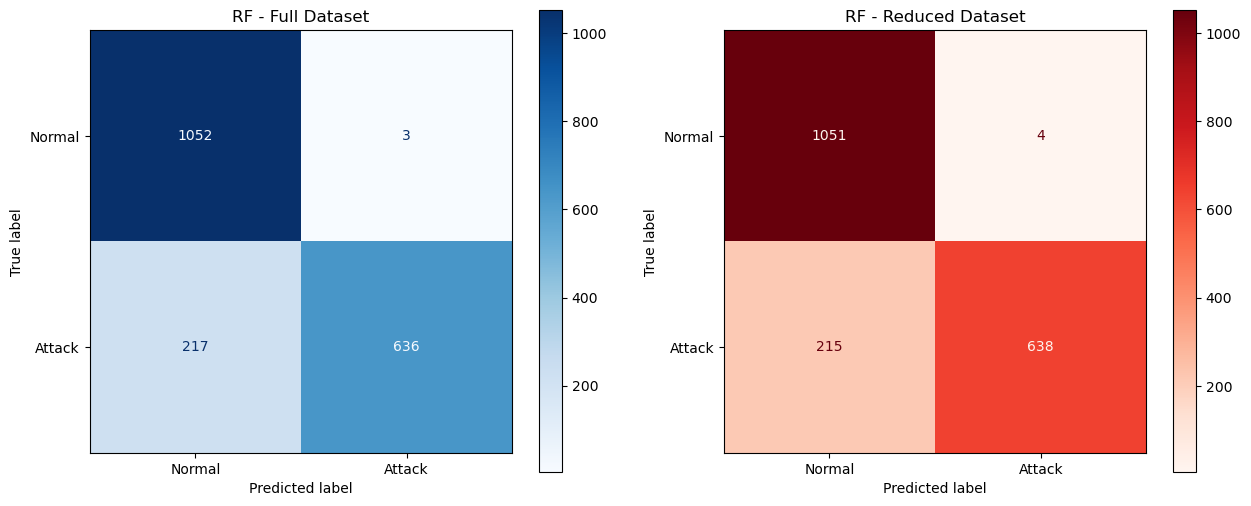

In [ ]:
# Results
print(f"\nBest Parameters (Full): {grid_search_rf_full.best_params_}")
print("RAPPORT CLASSIFICATION (Random Forest FULL):")
print(classification_report(y_test, y_pred_full, target_names=['Normal', 'Attack']))
print(f"AUC-ROC Score : {roc_auc_score(y_test, y_proba_full):.4f}")

print(f"\nBest Parameters (Reduced): {grid_search_rf_reduced.best_params_}")
print("RAPPORT CLASSIFICATION (Random Forest REDUCED):")
print(classification_report(y_test_reduced, y_pred_reduced, target_names=['Normal', 'Attack']))
print(f"AUC-ROC Score : {roc_auc_score(y_test_reduced, y_proba_reduced):.4f}")

# Matrices de Confusion
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_full, display_labels=['Normal', 'Attack'], cmap='Blues', ax=axes[0])
axes[0].set_title("RF - Full Dataset")

ConfusionMatrixDisplay.from_predictions(y_test_reduced, y_pred_reduced, display_labels=['Normal', 'Attack'], cmap='Reds', ax=axes[1])
axes[1].set_title("RF - Reduced Dataset")

plt.show()

### KNN


Best Parameters (Full): {'classifier__metric': 'manhattan', 'classifier__n_neighbors': 3, 'classifier__weights': 'distance'}
RAPPORT CLASSIFICATION (KNN FULL):
              precision    recall  f1-score   support

      Normal       0.79      0.89      0.83      1055
      Attack       0.83      0.70      0.76       853

    accuracy                           0.80      1908
   macro avg       0.81      0.79      0.80      1908
weighted avg       0.81      0.80      0.80      1908

AUC-ROC Score : 0.8334

Best Parameters (Reduced): {'classifier__metric': 'manhattan', 'classifier__n_neighbors': 3, 'classifier__weights': 'distance'}
RAPPORT CLASSIFICATION (KNN REDUCED):
              precision    recall  f1-score   support

      Normal       0.81      0.88      0.85      1055
      Attack       0.84      0.75      0.79       853

    accuracy                           0.82      1908
   macro avg       0.83      0.82      0.82      1908
weighted avg       0.82      0.82      0.82      1

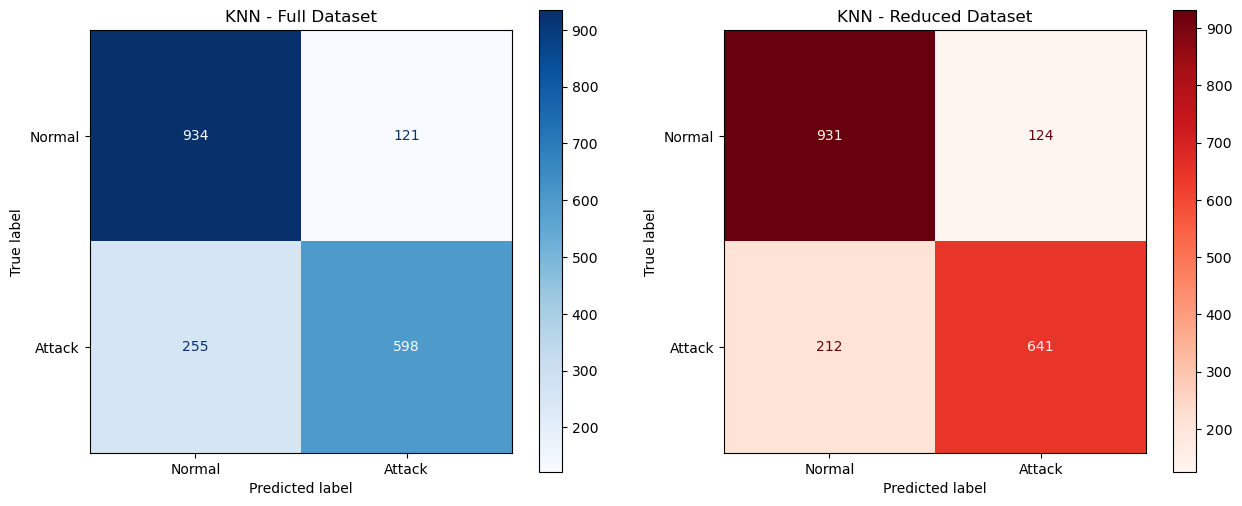

In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

# Define the hyperparameter grid for KNN.
param_grid_knn = {
    'classifier__n_neighbors': [3, 5, 7, 9, 11], 
    'classifier__weights': ['uniform', 'distance'],
    'classifier__metric': ['euclidean', 'manhattan'] 
}

#Full dataSet
# Construct the KNN Pipeline for the full dataset.
pipeline_knn_full = Pipeline([
    ('preprocessor', preprocessor), 
    ('classifier', KNeighborsClassifier())
])

# Initialize Grid Search for the full model.
grid_search_knn_full = GridSearchCV(pipeline_knn_full, param_grid_knn, cv=5, scoring='recall', n_jobs=-1)
# Execute Grid Search on the full training data. 
grid_search_knn_full.fit(X_train, y_train)

# Save the best-performing full KNN model.
best_model_knn_full = grid_search_knn_full.best_estimator_
# Predict class labels on the full test set.
y_pred_full = best_model_knn_full.predict(X_test)
# Predict probability scores for the positive class.
y_proba_full = best_model_knn_full.predict_proba(X_test)[:, 1]


#Reduced dataset 
# Construct the KNN Pipeline for the reduced dataset.
pipeline_knn_reduced = Pipeline([
    ('preprocessor', preprocessor_reduced),
    ('classifier', KNeighborsClassifier())
])

# Initialize Grid Search for the reduced model.
grid_search_knn_reduced = GridSearchCV(pipeline_knn_reduced, param_grid_knn, cv=5, scoring='recall', n_jobs=-1)
# Execute Grid Search on the reduced training data.
grid_search_knn_reduced.fit(X_train_reduced, y_train_reduced)

# Save the best-performing reduced KNN model.
best_model_knn_reduced = grid_search_knn_reduced.best_estimator_
# Predict class labels on the reduced test set.
y_pred_reduced = best_model_knn_reduced.predict(X_test_reduced)
# Predict probability scores for the positive class.
y_proba_reduced = best_model_knn_reduced.predict_proba(X_test_reduced)[:, 1]

# Results
print(f"\nBest Parameters (Full): {grid_search_knn_full.best_params_}")
print("RAPPORT CLASSIFICATION (KNN FULL):")
print(classification_report(y_test, y_pred_full, target_names=['Normal', 'Attack']))
print(f"AUC-ROC Score : {roc_auc_score(y_test, y_proba_full):.4f}")

print(f"\nBest Parameters (Reduced): {grid_search_knn_reduced.best_params_}")
print("RAPPORT CLASSIFICATION (KNN REDUCED):")
print(classification_report(y_test_reduced, y_pred_reduced, target_names=['Normal', 'Attack']))
print(f"AUC-ROC Score : {roc_auc_score(y_test_reduced, y_proba_reduced):.4f}")


# Create figure with 1 row and 2 columns for the two confusion matrices.
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot the Confusion Matrix for the full model. 
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_full, display_labels=['Normal', 'Attack'], cmap='Blues', ax=axes[0])
# Plot the Confusion Matrix for the reduced model.
ConfusionMatrixDisplay.from_predictions(y_test_reduced, y_pred_reduced, display_labels=['Normal', 'Attack'], cmap='Reds', ax=axes[1])

# Display the final plot containing both matrices.
plt.show()

### XGBoost

#### Using One-Hot Encoded

In [ ]:
import xgboost as xgb


# Separate features (X) and target (y) for the UNFILTERED dataset.
X = data_binary_unfiltered.drop(columns=['attack_detected'])
y = data_binary_unfiltered['attack_detected']

# Split the UNFILTERED data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Separate features (X) and target (y) for the REDUCED dataset.
X_reduced = data_binary_filtered.drop(columns=['attack_detected'])
y_reduced = data_binary_filtered['attack_detected']

# Split the REDUCED data into training and testing sets.
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(
    X_reduced, y_reduced, test_size=0.2, random_state=42, stratify=y_reduced
)


# Define the hyperparameter grid for XGBoost Grid Search.
param_grid_xgb = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [5, 7],
    'classifier__learning_rate': [0.05, 0.1],
    'classifier__subsample': [0.8, 1.0],
    'classifier__colsample_bytree': [0.8, 1.0]
}


# Construct the XGBoost Pipeline for the full dataset.
pipeline_xgb_full = Pipeline([
    ('preprocessor', preprocessor), 
    ('classifier', xgb.XGBClassifier(
        random_state=42,
        use_label_encoder=False,
        eval_metric='logloss'
    ))
])

# Initialize Grid Search for the full model.
grid_search_xgb_full = GridSearchCV(
    pipeline_xgb_full,
    param_grid_xgb,
    cv=5,
    scoring='recall', 
    n_jobs=-1
)

# Execute Grid Search on the full training data. 
grid_search_xgb_full.fit(X_train, y_train)
# Save the best-performing full XGBoost model.
best_xgb_full = grid_search_xgb_full.best_estimator_

# Predict class labels on the full test set.
y_pred_full = best_xgb_full.predict(X_test)
# Predict probability scores for the positive class.
y_proba_full = best_xgb_full.predict_proba(X_test)[:, 1]



# Construct the XGBoost Pipeline for the reduced dataset.
pipeline_xgb_reduced = Pipeline([
    ('preprocessor', preprocessor_reduced),
    ('classifier', xgb.XGBClassifier(
        random_state=42,
        use_label_encoder=False,
        eval_metric='logloss'
    ))
])

# Initialize Grid Search for the reduced model.
grid_search_xgb_reduced = GridSearchCV(
    pipeline_xgb_reduced,
    param_grid_xgb,
    cv=5,
    scoring='recall',
    n_jobs=-1
)

# Execute Grid Search on the reduced training data.
grid_search_xgb_reduced.fit(X_train_reduced, y_train_reduced)
# Save the best-performing reduced XGBoost model.
best_xgb_reduced = grid_search_xgb_reduced.best_estimator_

# Predict class labels on the reduced test set.
y_pred_reduced = best_xgb_reduced.predict(X_test_reduced)
# Predict probability scores for the positive class.
y_proba_reduced = best_xgb_reduced.predict_proba(X_test_reduced)[:, 1]


print("\n===== XGBoost FULL DATASET =====")
print("Best Params:", grid_search_xgb_full.best_params_)
print(classification_report(y_test, y_pred_full, target_names=['Normal', 'Attack']))
print(f"AUC-ROC: {roc_auc_score(y_test, y_proba_full):.4f}")

print("\n===== XGBoost REDUCED DATASET =====")
print("Best Params:", grid_search_xgb_reduced.best_params_)
print(classification_report(y_test_reduced, y_pred_reduced, target_names=['Normal', 'Attack']))
print(f"AUC-ROC: {roc_auc_score(y_test_reduced, y_proba_reduced):.4f}")


# Create figure with 1 row and 2 columns for the two confusion matrices.
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot the Confusion Matrix for the full model. 
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_full,
    display_labels=['Normal', 'Attack'],
    cmap='Blues', ax=axes[0]
)
axes[0].set_title("XGBoost - Full Dataset")

# Plot the Confusion Matrix for the reduced model.
ConfusionMatrixDisplay.from_predictions(
    y_test_reduced, y_pred_reduced,
    display_labels=['Normal', 'Attack'],
    cmap='Reds', ax=axes[1]
)
axes[1].set_title("XGBoost - Reduced Dataset")

# Display the final plot containing both matrices.
plt.show()

ValueError: 
All the 160 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
160 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\chloe\anaconda3\Lib\site-packages\pandas\core\indexes\base.py", line 3805, in get_loc
    return self._engine.get_loc(casted_key)
           ~~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
  File "index.pyx", line 167, in pandas._libs.index.IndexEngine.get_loc
  File "index.pyx", line 196, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\\_libs\\hashtable_class_helper.pxi", line 7081, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas\\_libs\\hashtable_class_helper.pxi", line 7089, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'protocol_type'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "c:\Users\chloe\anaconda3\Lib\site-packages\sklearn\utils\_indexing.py", line 364, in _get_column_indices
    col_idx = all_columns.get_loc(col)
  File "c:\Users\chloe\anaconda3\Lib\site-packages\pandas\core\indexes\base.py", line 3812, in get_loc
    raise KeyError(key) from err
KeyError: 'protocol_type'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "c:\Users\chloe\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\chloe\anaconda3\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\chloe\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 654, in fit
    Xt = self._fit(X, y, routed_params, raw_params=params)
  File "c:\Users\chloe\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 588, in _fit
    X, fitted_transformer = fit_transform_one_cached(
                            ~~~~~~~~~~~~~~~~~~~~~~~~^
        cloned_transformer,
        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
        params=step_params,
        ^^^^^^^^^^^^^^^^^^^
    )
    ^
  File "c:\Users\chloe\anaconda3\Lib\site-packages\joblib\memory.py", line 312, in __call__
    return self.func(*args, **kwargs)
           ~~~~~~~~~^^^^^^^^^^^^^^^^^
  File "c:\Users\chloe\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 1551, in _fit_transform_one
    res = transformer.fit_transform(X, y, **params.get("fit_transform", {}))
  File "c:\Users\chloe\anaconda3\Lib\site-packages\sklearn\utils\_set_output.py", line 319, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "c:\Users\chloe\anaconda3\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\chloe\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py", line 993, in fit_transform
    self._validate_column_callables(X)
    ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~^^^
  File "c:\Users\chloe\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py", line 552, in _validate_column_callables
    transformer_to_input_indices[name] = _get_column_indices(X, columns)
                                         ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
  File "c:\Users\chloe\anaconda3\Lib\site-packages\sklearn\utils\_indexing.py", line 372, in _get_column_indices
    raise ValueError("A given column is not a column of the dataframe") from e
ValueError: A given column is not a column of the dataframe
